<a href="https://colab.research.google.com/github/leeryleprechaun/MSDS_Practicum_Public/blob/main/week_6_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Update
#### After lasts night's meeting the best model appears to by a Lasso Regression model with an R2 of 0.388, the model was built by Michelle but is using the unadjusted values.

## Suggestions for this week are...


*   Look at 1 primary sector at a time
*   Try non-linear models
*   Try model with additional data
*   Use MAE or Root Mean Squared
*   Keep the Y variable unscaled (pull it from the original set)


## Other Items to look at would be....


*   Try a log scaler
*   GXBoost
*   Deep Learning Approach
*   Trim data again (quantile)






In [ ]:
# Loading in the data set
# This is just the large frame of 810 companies with trust scores
# All the emissions data is adjusted for revenue

import pandas as pd

url=''
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    810 non-null    int64  
 1   account_number                810 non-null    int64  
 2   organization                  810 non-null    object 
 3   country                       810 non-null    object 
 4   primary_activity              810 non-null    object 
 5   primary_sector                810 non-null    object 
 6   primary_industry              810 non-null    object 
 7   cat_6                         810 non-null    float64
 8   cat_2                         810 non-null    float64
 9   cat_13                        810 non-null    float64
 10  cat_9                         810 non-null    float64
 11  cat_7                         810 non-null    float64
 12  cat_12                        810 non-null    float64
 13  cat_1

In [ ]:
# I am gonig to set the account number as the index AND drop the organization names, which will not help with modeling
newdf = df

newdf = newdf.drop(['Unnamed: 0', 'country', 
    'verification_cycle_in_place', 'Account',
    'report_status', 'statement', 'Organization',
    'verification_type',
    'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5',
    'cat_6', 'cat_7', 'cat_8', 'cat_9', 'cat_10', 
    'cat_11', 'cat_12', 'cat_13', 'total_emissions',
    'cat_14', 'cat_15', 'cat_16', 'cat_17', 'revenue / emissions' ], axis=1)
newdf

In [ ]:
# Importing libraries and changing 0 to nan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

newdf = newdf.replace(0, np.nan)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_number                810 non-null    int64  
 1   organization                  810 non-null    object 
 2   primary_activity              810 non-null    object 
 3   primary_sector                810 non-null    object 
 4   primary_industry              810 non-null    object 
 5   revenue                       810 non-null    float64
 6   Percent S3 verified           401 non-null    float64
 7   Percent S3 verified FILTERED  230 non-null    float64
 8   cat_1_adj                     634 non-null    float64
 9   cat_2_adj                     437 non-null    float64
 10  cat_3_adj                     607 non-null    float64
 11  cat_4_adj                     498 non-null    float64
 12  cat_5_adj                     593 non-null    float64
 13  cat_6

In [ ]:
# Adding the scope 1 and 2 emissions columns

url=''
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
scope12 = pd.read_csv(url)
scope12.info()





In [ ]:
mergedf = newdf.merge(scope12, left_on="organization", right_on="Organization")
df2 = mergedf.set_index("account_number")
df2 = df2.drop(["Organization", "organization", "Account number"], axis=1)
df2.columns = [*df2.columns[:-1], 'scope_1_2']
df2.head(2)

In [ ]:
#  Importing libraries and changing 0 to nan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df2 = df2.replace(0, np.nan)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 31799 to 6841
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   primary_activity              887 non-null    object 
 1   primary_sector                887 non-null    object 
 2   primary_industry              887 non-null    object 
 3   revenue                       887 non-null    float64
 4   Percent S3 verified           440 non-null    float64
 5   Percent S3 verified FILTERED  254 non-null    float64
 6   cat_1_adj                     694 non-null    float64
 7   cat_2_adj                     477 non-null    float64
 8   cat_3_adj                     667 non-null    float64
 9   cat_4_adj                     540 non-null    float64
 10  cat_5_adj                     651 non-null    float64
 11  cat_6_adj                     796 non-null    float64
 12  cat_7_adj                     602 non-null    float64
 13  

In [ ]:
df3 = df2

In [ ]:
# Chemicals Sector
df_chemicals = df3[(df3.primary_sector == 'Chemicals')]
df_chemicals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 61706 to 20928
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   primary_activity              58 non-null     object 
 1   primary_sector                58 non-null     object 
 2   primary_industry              58 non-null     object 
 3   revenue                       58 non-null     float64
 4   Percent S3 verified           27 non-null     float64
 5   Percent S3 verified FILTERED  24 non-null     float64
 6   cat_1_adj                     55 non-null     float64
 7   cat_2_adj                     44 non-null     float64
 8   cat_3_adj                     53 non-null     float64
 9   cat_4_adj                     55 non-null     float64
 10  cat_5_adj                     51 non-null     float64
 11  cat_6_adj                     55 non-null     float64
 12  cat_7_adj                     49 non-null     float64
 13  

In [ ]:
# Powered Machinery
df_power_machine = df3[(df3.primary_sector == 'Powered machinery')]
df_power_machine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 5411 to 4136
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   primary_activity              45 non-null     object 
 1   primary_sector                45 non-null     object 
 2   primary_industry              45 non-null     object 
 3   revenue                       45 non-null     float64
 4   Percent S3 verified           19 non-null     float64
 5   Percent S3 verified FILTERED  10 non-null     float64
 6   cat_1_adj                     39 non-null     float64
 7   cat_2_adj                     34 non-null     float64
 8   cat_3_adj                     38 non-null     float64
 9   cat_4_adj                     35 non-null     float64
 10  cat_5_adj                     36 non-null     float64
 11  cat_6_adj                     42 non-null     float64
 12  cat_7_adj                     36 non-null     float64
 13  ca

In [ ]:
# Financial services
df_financial = df3[(df3.primary_sector == 'Financial services')]
df_financial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 9411 to 15169
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   primary_activity              115 non-null    object 
 1   primary_sector                115 non-null    object 
 2   primary_industry              115 non-null    object 
 3   revenue                       115 non-null    float64
 4   Percent S3 verified           74 non-null     float64
 5   Percent S3 verified FILTERED  38 non-null     float64
 6   cat_1_adj                     83 non-null     float64
 7   cat_2_adj                     34 non-null     float64
 8   cat_3_adj                     74 non-null     float64
 9   cat_4_adj                     24 non-null     float64
 10  cat_5_adj                     79 non-null     float64
 11  cat_6_adj                     110 non-null    float64
 12  cat_7_adj                     62 non-null     float64
 13  

## Financial services
It looks like there is a lot of data here, so I am going to run with this data set for now

In [ ]:
# Now I am going to create a sheet that has the missing values that need to be imputed
complete_df = df_financial[df_financial.cat_1_adj.notnull()]

missing_df = df_financial[df_financial.cat_1_adj.isnull()]
complete_df.info()
#missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 9411 to 15169
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   primary_activity              83 non-null     object 
 1   primary_sector                83 non-null     object 
 2   primary_industry              83 non-null     object 
 3   revenue                       83 non-null     float64
 4   Percent S3 verified           58 non-null     float64
 5   Percent S3 verified FILTERED  38 non-null     float64
 6   cat_1_adj                     83 non-null     float64
 7   cat_2_adj                     33 non-null     float64
 8   cat_3_adj                     59 non-null     float64
 9   cat_4_adj                     21 non-null     float64
 10  cat_5_adj                     64 non-null     float64
 11  cat_6_adj                     82 non-null     float64
 12  cat_7_adj                     50 non-null     float64
 13  c

In [ ]:
# Creating dummy variables
df5 = complete_df
df5 = pd.get_dummies(df_financial, columns=['primary_activity', 'primary_sector', 'primary_industry'], prefix=['sector','activity','industry'])
df5.head(5)

,revenue,Percent S3 verified,Percent S3 verified FILTERED,cat_1_adj,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,...,cat_15_adj,cat_16_adj,cat_17_adj,scope_1_2,sector_Asset managers,sector_Banks,sector_Insurance,sector_REIT,activity_Financial services,industry_Services
account_number,,,,,,,,,,,,,,,,,,,,,
9411,9.640943e+09,76.521739,100.0,0.000529,0.001857,0.002801,NaN,NaN,0.006742,NaN,...,NaN,NaN,NaN,88.0,1,0,0,0,1,1
44291,1.590064e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035659,NaN,...,NaN,NaN,NaN,2583.4,1,0,0,0,1,1
44291,1.590064e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035659,NaN,...,NaN,NaN,NaN,31.6,1,0,0,0,1,1
252,5.024045e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042575,NaN,...,NaN,NaN,NaN,5095.0,0,0,1,0,1,1
252,5.024045e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042575,NaN,...,NaN,NaN,NaN,4153.0,0,0,1,0,1,1


In [ ]:
df5 =df5.fillna(0)

In [ ]:
# Correlation matrix
correlation_matrix = df5.corr()
correlation_matrix['cat_1_adj']

revenue                        -0.140234
Percent S3 verified            -0.025733
Percent S3 verified FILTERED    0.041684
cat_1_adj                       1.000000
cat_2_adj                       0.540524
cat_3_adj                       0.152432
cat_4_adj                       0.006465
cat_5_adj                       0.115845
cat_6_adj                       0.091310
cat_7_adj                       0.089036
cat_8_adj                      -0.056954
cat_9_adj                       0.173341
cat_10_adj                           NaN
cat_11_adj                      0.077991
cat_12_adj                      0.536070
cat_13_adj                      0.533744
cat_14_adj                           NaN
cat_15_adj                           NaN
cat_16_adj                     -0.004033
cat_17_adj                      0.174311
scope_1_2                      -0.078896
sector_Asset managers          -0.069624
sector_Banks                   -0.167706
sector_Insurance               -0.111908
sector_REIT     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


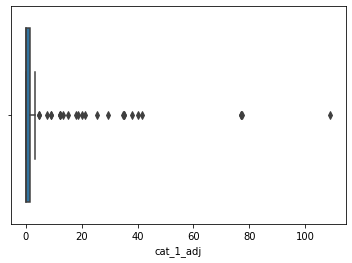

In [ ]:
# Taking a look at the values in a boxplot
sns.boxplot(df5.cat_1_adj, x='length')

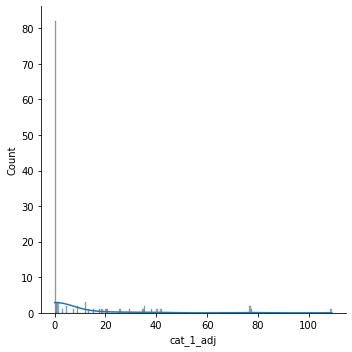

In [ ]:
#Looking at the distribution
sns.displot(df5.cat_1_adj, kde=True)

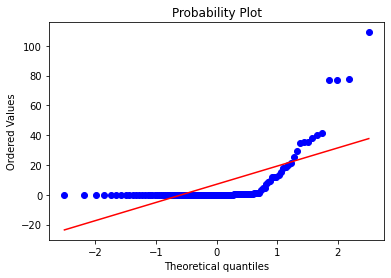

In [ ]:
# Looking at the probability
import scipy.stats as stats
res = stats.probplot(df5.cat_1_adj, plot=plt)

In [ ]:
# Here is a shapiro test for distribution
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df5.cat_1_adj)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=0.458, p=0.000
Sample does not look normally distributed (reject H0)


In [ ]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df5.cat_1_adj)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=110.540, p=0.000
Sample does not look normally distributed (reject H0)


# Logistic Regression looks like it may be a good fit for this data

In [ ]:
# Loading in the packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 9411 to 15169
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   revenue                       115 non-null    float64
 1   Percent S3 verified           115 non-null    float64
 2   Percent S3 verified FILTERED  115 non-null    float64
 3   cat_1_adj                     115 non-null    float64
 4   cat_2_adj                     115 non-null    float64
 5   cat_3_adj                     115 non-null    float64
 6   cat_4_adj                     115 non-null    float64
 7   cat_5_adj                     115 non-null    float64
 8   cat_6_adj                     115 non-null    float64
 9   cat_7_adj                     115 non-null    float64
 10  cat_8_adj                     115 non-null    float64
 11  cat_9_adj                     115 non-null    float64
 12  cat_10_adj                    115 non-null    float64
 13  

In [ ]:
# I need to change the sectors to catagories and not int

df5 = df5.drop(['activity_Financial services', 'industry_Services'], axis=1)

cols = ['sector_Asset managers', 'sector_Banks', 'sector_Insurance', 'sector_REIT']
df5[cols] = df5[cols].astype('category')

df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 9411 to 15169
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   revenue                       115 non-null    float64 
 1   Percent S3 verified           115 non-null    float64 
 2   Percent S3 verified FILTERED  115 non-null    float64 
 3   cat_1_adj                     115 non-null    float64 
 4   cat_2_adj                     115 non-null    float64 
 5   cat_3_adj                     115 non-null    float64 
 6   cat_4_adj                     115 non-null    float64 
 7   cat_5_adj                     115 non-null    float64 
 8   cat_6_adj                     115 non-null    float64 
 9   cat_7_adj                     115 non-null    float64 
 10  cat_8_adj                     115 non-null    float64 
 11  cat_9_adj                     115 non-null    float64 
 12  cat_10_adj                    115 non-null   

In [ ]:
# moving the target column to the last position
cols = list(df5.columns.values)
cols.pop(cols.index('cat_1_adj'))
df5 = df5[cols+['cat_1_adj']]
df5.head(2)

,revenue,Percent S3 verified,Percent S3 verified FILTERED,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,...,cat_14_adj,cat_15_adj,cat_16_adj,cat_17_adj,scope_1_2,sector_Asset managers,sector_Banks,sector_Insurance,sector_REIT,cat_1_adj
account_number,,,,,,,,,,,,,,,,,,,,,
9411,9.640943e+09,76.521739,100.0,0.001857,0.002801,0.0,0.0,0.006742,0.0,0.0,...,0.0,0.0,0.0,0.0,88.0,1,0,0,0,0.000529
44291,1.590064e+08,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.035659,0.0,0.0,...,0.0,0.0,0.0,0.0,2583.4,1,0,0,0,0.000000


In [ ]:
# Creating x and y variables
x = df5.drop("cat_1_adj", axis=1)
X = x.values
y = df5["cat_1_adj"]
Y = y.values

In [ ]:
# creating a train and test group
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# define and fit our model
# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


model = KNeighborsRegressor(n_neighbors=15, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=15)

In [ ]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[8.89005099e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.80234135e-02 4.36434783e-02 0.00000000e+00 0.00000000e+00
 7.03510653e-02 1.33376803e-02 3.09615143e+00 0.00000000e+00
 4.55522548e+00 2.01476672e+01 3.11007010e-01 5.28993885e-04
 1.22705576e+00 6.99977486e-02 8.14000577e-02 5.25207809e-02
 4.16092557e+01 3.52397530e+01 1.33376803e-02]
Predictions for test data set
[ 2.13224823  7.79306745 10.95347918  6.64110852  3.07177534  3.07177534
  6.64110852  6.51456305  1.37550487  1.07182317 11.84198155  4.20273022
  6.714976    8.62986377  2.74846714  2.15338038  5.89497517  4.20273022
 11.76294245  2.97687571  6.714976   21.4492821   1.07182317]


In [ ]:
#compare the two sets for 'success'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[  6.75780275  -7.79306745 -10.95347918  -6.64110852  -3.03375193
  -3.02813187  -6.64110852  -6.51456305  -1.30515381  -1.05848549
  -8.74583012  -4.20273022  -2.15975052  11.51780344  -2.43746013
  -2.15285139  -4.66791941  -4.13273247 -11.68154239  -2.92435493
  34.89427965  13.79047095  -1.05848549]


In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

0.2396252535516018


In [ ]:
cols = df5.columns
target_col = 'cat_1_adj'
feat_cols = [c for c in cols if c != target_col]


array = df5.values

X = array[:, 0:23]
y = array[:, 24]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['revenue', 'Percent S3 verified', 'Percent S3 verified FILTERED', 'cat_2_adj', 'cat_3_adj', 'cat_4_adj', 'cat_5_adj', 'cat_6_adj', 'cat_7_adj', 'cat_8_adj', 'cat_9_adj', 'cat_10_adj', 'cat_11_adj', 'cat_12_adj', 'cat_13_adj', 'cat_14_adj', 'cat_15_adj', 'cat_16_adj', 'cat_17_adj', 'scope_1_2', 'sector_Asset managers', 'sector_Banks', 'sector_Insurance', 'sector_REIT'] 
Target: cat_1_adj
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


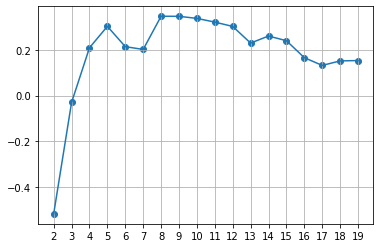

In [ ]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

#K-Fold Cross-Validation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [ ]:
# evaluate each model in turn
seed = 42
num_folds = 8
scoring = 'neg_mean_squared_error'

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -170.935198 (153.295028)
LASSO: -255.432941 (192.174707)
EN: -264.803906 (205.109920)
KNN: -432.501571 (243.237115)
CART: -690.162764 (878.726493)


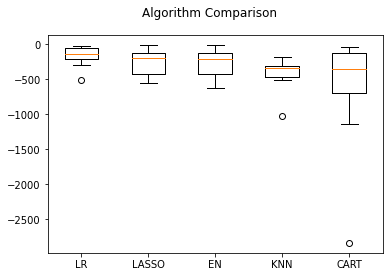

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Scaling the Data

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

In [ ]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -170.935198 (153.295028)
ScaledLASSO: -239.723518 (220.558583)
ScaledEN: -225.085057 (204.092584)
ScaledKNN: -334.730564 (256.568282)
ScaledCART: -514.263528 (609.612683)


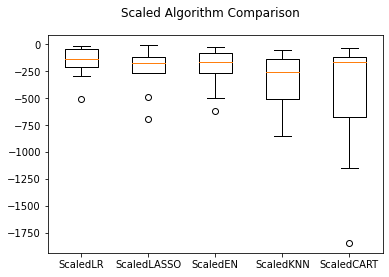

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Taking a look at some more models

In [ ]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))

In [ ]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -277.658088 (291.419931)
ScaledGBM: -507.920211 (566.039546)
ScaledRF: -407.727952 (367.857581)
ScaledET: -270.789088 (216.633686)


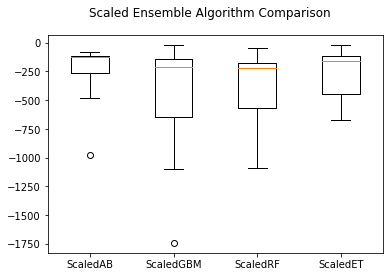

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 3.6 MB/s eta 0:00:00


In [ ]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2_qhuc90
  JVM stdout: /tmp/tmp2_qhuc90/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2_qhuc90/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_ygspda
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
hf = h2o.H2OFrame(df5)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
hf

revenue,Percent S3 verified,Percent S3 verified FILTERED,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,cat_9_adj,cat_10_adj,cat_11_adj,cat_12_adj,cat_13_adj,cat_14_adj,cat_15_adj,cat_16_adj,cat_17_adj,scope_1_2,sector_Asset managers,sector_Banks,sector_Insurance,sector_REIT,cat_1_adj
9.64094e+09,76.5217,100,0.00185666,0.00280056,0,0,0.00674208,0,0,0,0,0,0,0,0,0,0,0,88,1,0,0,0,0.000528994
1.59006e+08,0,0,0,0,0,0,0.0356589,0,0,0,0,0,0,0,0,0,0,0,2583.4,1,0,0,0,0
1.59006e+08,0,0,0,0,0,0,0.0356589,0,0,0,0,0,0,0,0,0,0,0,31.6,1,0,0,0,0
5.02404e+10,0,0,0,0,0,0,0.0425753,0,0,0,0,0,0,0,0,0,0,0,5095,0,0,1,0,0
5.02404e+10,0,0,0,0,0,0,0.0425753,0,0,0,0,0,0,0,0,0,0,0,4153,0,0,1,0,0
7.17876e+10,100,100,0,0,0,0.0233048,0.0542015,0,0,0,0,0,0,0,0,0,0,0,66395,0,0,1,0,0.0184572
2.34315e+10,100,100,0,0,0,0.0107548,0.0480977,0,0,0,0,0,0,0,0,0,0,0,195777,0,1,0,0,0.0488659
1.2109e+10,0,0,0,0,0,0,0.114295,0,0,0,0,0,0,0,0,0,0,0,52169,1,0,0,0,0
2.26944e+10,34.5718,0,0,0.0869819,0,0,0.048382,0,0,0,0,0,0,0,0,0,0,0,11845,0,0,1,0,0.00458263
2.06058e+10,0,0,0,0,0,0,0,0,0,0.167768,0,0,0,0,0,0,0,0,1.25101e+06,0,1,0,0,0


In [ ]:
hf.types

{'revenue': 'real',
 'Percent S3 verified': 'real',
 'Percent S3 verified FILTERED': 'real',
 'cat_2_adj': 'real',
 'cat_3_adj': 'real',
 'cat_4_adj': 'real',
 'cat_5_adj': 'real',
 'cat_6_adj': 'real',
 'cat_7_adj': 'real',
 'cat_8_adj': 'real',
 'cat_9_adj': 'real',
 'cat_10_adj': 'int',
 'cat_11_adj': 'real',
 'cat_12_adj': 'real',
 'cat_13_adj': 'real',
 'cat_14_adj': 'int',
 'cat_15_adj': 'int',
 'cat_16_adj': 'real',
 'cat_17_adj': 'real',
 'scope_1_2': 'real',
 'sector_Asset managers': 'int',
 'sector_Banks': 'int',
 'sector_Insurance': 'int',
 'sector_REIT': 'int',
 'cat_1_adj': 'real'}

gbm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [cat_14_adj, cat_10_adj, cat_15_adj]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


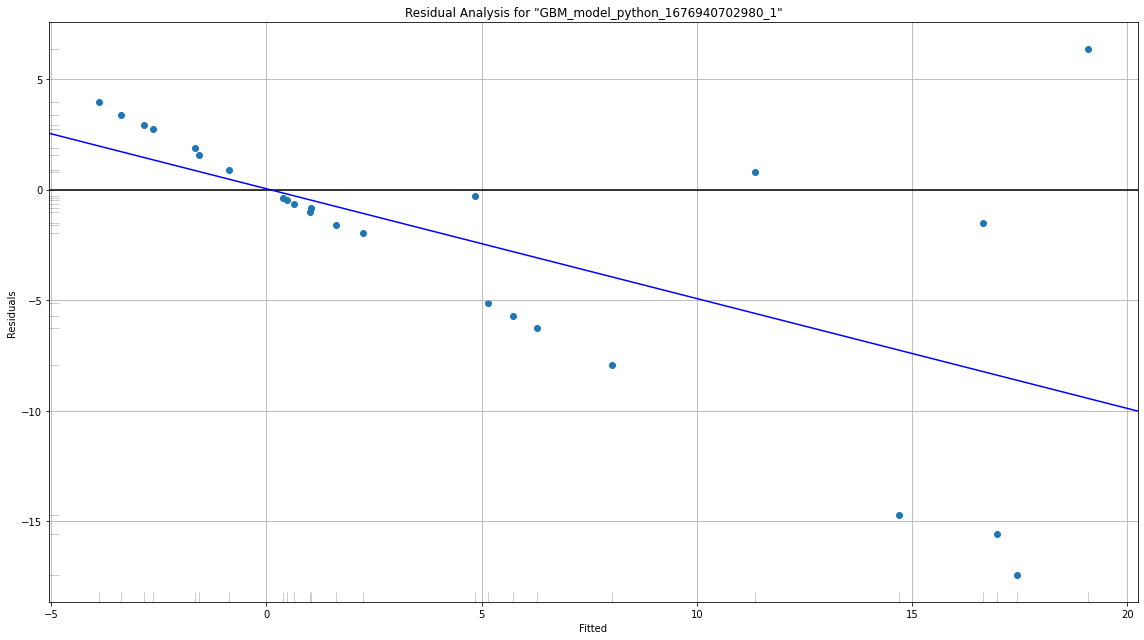

In [ ]:
from h2o.estimators import H2OGradientBoostingEstimator

predictors = hf.columns
predictors.remove('cat_1_adj')
response = 'cat_1_adj'

# Split the dataset into a train and valid set:
train, test = hf.split_frame(ratios=[.8], seed=1234, )

# Build and train the model:
gbm = H2OGradientBoostingEstimator()
gbm.train(y = response, training_frame = train)



# Eval performance:
gbm.residual_analysis_plot(test)

#Lasso Model

In [ ]:
df5.head(2)

,revenue,Percent S3 verified,Percent S3 verified FILTERED,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,...,cat_14_adj,cat_15_adj,cat_16_adj,cat_17_adj,scope_1_2,sector_Asset managers,sector_Banks,sector_Insurance,sector_REIT,cat_1_adj
account_number,,,,,,,,,,,,,,,,,,,,,
9411,9.640943e+09,76.521739,100.0,0.001857,0.002801,0.0,0.0,0.006742,0.0,0.0,...,0.0,0.0,0.0,0.0,88.0,1,0,0,0,0.000529
44291,1.590064e+08,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.035659,0.0,0.0,...,0.0,0.0,0.0,0.0,2583.4,1,0,0,0,0.000000


In [ ]:
from sklearn import linear_model

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import absolute

data = df5.values
X, y = data[:, :-1], data[:, -1]


model = Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 11.374 (9.385)


In [ ]:
## Tunning lasso regression model

from numpy import arange
from sklearn.model_selection import RepeatedKFold
import pandas as pd
from sklearn.linear_model import LassoCV

## load the dataset
data = df5.values
X, y = data[:, :-1], data[:, -1]

model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train, y_train)
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)


print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))




10.539304330943173
0.6961807939575825
95.50463446066486
-71.07928062095894


In [ ]:
# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset


data = df5.values

X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -11.038
Config: {'alpha': 0.21}


In [ ]:
data = df5.values
X, y = data[:, :-1], data[:, -1]


model = Lasso(alpha=0.21)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('The r2 value is', r2_score(y_train, pred_train_lasso))
print('The mean squared error is', np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

Mean MAE: 11.038 (10.736)
10.539304330943173
The r2 value is 0.6961807939575825
The mean squared error is 95.50463446066486
-71.07928062095894
